<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Part-1" data-toc-modified-id="Part-1-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Part 1</a></span></li><li><span><a href="#Part-2" data-toc-modified-id="Part-2-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Part 2</a></span></li><li><span><a href="#Part-3" data-toc-modified-id="Part-3-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Part 3</a></span></li></ul></div>

# Tutorial 4 - Computational Biology

## Part 1

Write down the differential equation describing the system of chemical equations (assuming a volume of 1) <br>
1) ∅ → X at a rate 1 <br>
2) X → Y at rate 2 <br>
3) 2 X + Y → 3 X at rate 0.02 <br>
4) X → ∅ at rate 0.04 <br>

Systems of chemical equations are used to represent how gene regulation takes place. Converting in differential form the system shown above, the following two differential equations have been identified.

$$ k_{1} = 1, k_{2} = 2, k_{3} = 0.02, k_{4} = 0.04 $$ <br>
$$ \frac{\partial x}{\partial t} = k_{1} - k_{2}\times x(t) - k_{4}\times x(t) - k_{3} \times x(t)^2 \times y(t) $$ <br>
$$ \frac{\partial y}{\partial t} = k_{2}\times x(t) - x(t)^2 \times y(t) $$

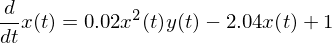

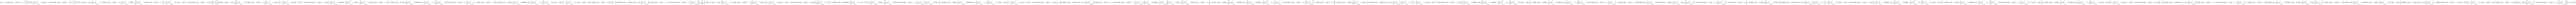

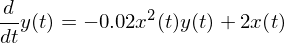

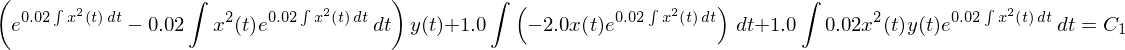

In [1]:
from sympy.interactive import printing
printing.init_printing(use_latex=True)
from sympy import *
import sympy as sp

k1 = 1
k2 = 2
k3 = 0.02
k4 = 0.04

t = sp.symbols('t')
y = sp.symbols('y')
#x = sp.symbols('x')
x = sp.Function('x')
# y = sp.Function('y')

eq = sp.Eq(x(t).diff(t),(k1 + k3*y(t)*(x(t)**2)) -(k4*x(t) + k2*x(t)))
display(eq)
so = dsolve(eq)
display(so)

x = sp.symbols('x')
y = sp.Function('y')

eq2 = Eq(y(t).diff(t),(k2*x(t) - k3*y(t)*(x(t)**2)))
display(eq2)
display(dsolve(eq2))

## Part 2

Use a package to solve the differential equation for 500 time units starting from X(0)=Y(0)=0 (matlab will do this)

In [1]:
# import plotly
# print(plotly.__version__)
import plotly
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

In [3]:
import plotly.plotly as py
import plotly.graph_objs as go

# Create random data with numpy
import numpy as np
from scipy.integrate import odeint

# function that returns dy/dt
def model_fun(inp,t):
    k1 = 1
    k2 = 2
    k3 = 0.02
    k4 = 0.04
    x = inp[0]
    y = inp[1]
    dydt = (k2*x - k3*y*(x**2))
    dxdt = (k1 + k3*y*(x**2)) -(k4*x + k2*x)
#     dydt = (((k2*x)) - ((k3*y*(x**2))/(a**2)))
#     dxdt = ((k1*a + ((k3*y*(x**2))/(a**2))) - (((k4*x)) + ((k2*x))))
    return [dxdt,dydt]

# initial condition
z = [0,0]

# time points
t = np.linspace(0,500,500)
# solve ODEs
x1 = odeint(model_fun,z,t)

z1 = [14,20]
x2 = odeint(model_fun,z1,t)

# Create a trace
dxdt = go.Scatter(
    x = t,
    y = x1[:,0],
    name = 'dxdt'
)

# Create a trace
dydt = go.Scatter(
    x = t,
    y = x1[:,1],
    name = 'dydt'
)

# Create a trace
dxdt2 = go.Scatter(
    x = t,
    y = x2[:,0],
    name = 'dxdt x(0)=14'
)

# Create a trace
dydt2 = go.Scatter(
    x = t,
    y = x2[:,1],
    name = 'dydt y(0)=20'
)


data = [dxdt, dydt, dxdt2, dydt2]
layout = go.Layout(
    title=go.layout.Title(
        text='Differential Equations solved for 500 time units',
        xref='paper',
        x=0
    ),
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text='Time',
            font=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        )
    ),
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            text='Concentration, X,Y',
            font=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        )
    )
)
fig1 = go.Figure(data=data, layout=layout)
py.iplot(fig1, filename='styling-names')

In [4]:
k1 = 1
k2 = 2
k3 = 0.02
k4 = 0.04

xpl = np.linspace(23,26,500)
res = (k2*xpl)/(k3*(xpl**2))    
res2 = (-k1+k2*xpl+k4*xpl)/(k3*(xpl**2))

# Create a trace
conc = go.Scatter(
    x = x1[:,0],
    y = x1[:,1],
    name = 'Concentration'
)

line1 = go.Scatter(
    x = xpl,
    y = res,
    name = 'dxdt=0'
)

line2 = go.Scatter(
    x = xpl,
    y = res2,
    name = 'dydt=0'
)

line3 = go.Scatter(
    x = [((k1)/(k4))],
    y = [((k2*k4)/(k3*k1))],
    name = 'Nullcline'
)

data = [conc, line1, line2, line3]

layout = go.Layout(
    title=go.layout.Title(
        text='X vs Y concentration',
        xref='paper',
        x=0
    ),
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text='Concentration, X',
            font=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        )
    ),
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            text='Concentration, Y',
            font=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        )
    )
)
fig2 = go.Figure(data=data, layout=layout)

py.iplot(fig2,filename='styling-names')

In [5]:
k1 = 1
k2 = 2
k3 = 0.02
k4 = 0.04

xpl = np.linspace(23,26,500)
res = (k2*xpl)/(k3*(xpl**2))    
res2 = (-k1+k2*xpl+k4*xpl)/(k3*(xpl**2))

# Create a trace
line1 = go.Scatter(
    x = xpl,
    y = res,
    name = 'dxdt=0'
)

line2 = go.Scatter(
    x = xpl,
    y = res2,
    name = 'dydt=0'
)

line3 = go.Scatter(
    x = [((k1)/(k4))],
    y = [((k2*k4)/(k3*k1))],
    name = 'Nullcline'
)

data = [line1,line2,line3]

layout = go.Layout(
    title=go.layout.Title(
        text='Finding the intersection between dxdt=0 and dydt=0 (Nullcline)',
        xref='paper',
        x=0
    )
)
fig3 = go.Figure(data=data, layout=layout)

py.iplot(fig3,filename='styling-names')

In [6]:
a = 6.022140857*(10**(23))
k1 = np.linspace(1,35,100)
# function that returns dy/dt
def model_fun(inp,k1):
    #k1 = 1
    k2 = k1
    k3 = 0.02
    k4 = 0.04
    x = inp[0]
    y = inp[1]
    dydt = (((k2*x)) - ((k3*y*(x**2))))
    dxdt = ((k1 + ((k3*y*(x**2))) - (((k4*x)) + ((k2*x)))))
    return [dxdt,dydt]

# initial condition
z = [0,0]

# time points
t = np.linspace(0,500,500)
# solve ODEs
x1 = odeint(model_fun,z,k1)

# Create a trace
kconc = go.Scatter(
    x = k1,
    y = x1[:,0],
    name = 'Concentration, X'
)

# Create a trace
kconc2 = go.Scatter(
    x = k1,
    y = x1[:,1],
    name = 'Concentration, Y'
)


data = [kconc, kconc2]
layout = go.Layout(
    title=go.layout.Title(
        text='How the concentration of X and Y changes varying k1',
        xref='paper',
        x=0
    ),
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text='Varying k1 (k2)',
            font=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        )
    ),
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            text='Concentration of X and Y',
            font=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        )
    )
)
fig4 = go.Figure(data=data, layout=layout)
py.iplot(fig4, filename='styling-names')

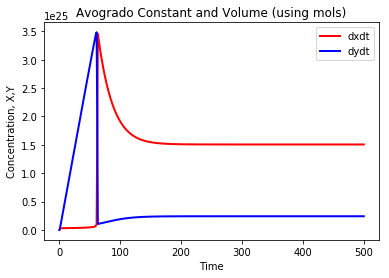

In [3]:
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import numpy as np

a = 6.022140857*(10**(23))

# function that returns dy/dt
def model_fun(inp,t):
    k1 = 1
    k2 = 2
    k3 = 0.02
    k4 = 0.04
    x = inp[0]
    y = inp[1]
    dydt = (((k2*x)) - ((k3*y*(x**2))/(a**2)))
    dxdt = ((k1*a + ((k3*y*(x**2))/(a**2))) - (((k4*x)) + ((k2*x))))
    return [dxdt,dydt]

# initial condition
z = [0,0]

# time points
t = np.linspace(0,500,500)
# solve ODEs
x1 = odeint(model_fun,z,t)

# plot results
plt.plot(t,x1[:,0],'r-',linewidth=2,label='dxdt')
plt.plot(t,x1[:,1],'b-',linewidth=2,label='dydt')
plt.title('Avogrado Constant and Volume (using mols)')
plt.xlabel('Time')
plt.ylabel('Concentration, X,Y')
plt.legend()
plt.show()

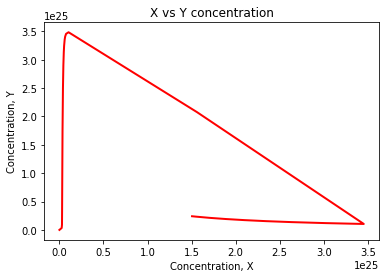

In [8]:
k1 = 1
k2 = 2
k3 = 0.02
k4 = 0.04

plt.plot(x1[:,0], x1[:,1],'r-',linewidth=2)
plt.xlabel('Concentration, X')
plt.ylabel('Concentration, Y')
plt.title('X vs Y concentration')
plt.show()

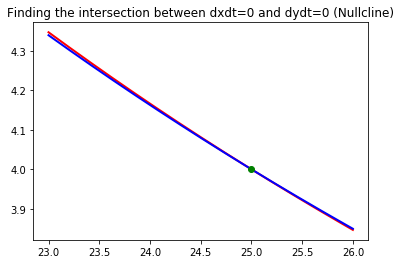

In [9]:
xpl = np.linspace(23,26,500)
res = (k2*xpl)/(k3*(xpl**2))    
res2 = (-k1+k2*xpl+k4*xpl)/(k3*(xpl**2))

plt.plot(xpl, res,'r-',linewidth=2,label='y')
plt.plot(xpl, res2,'b-',linewidth=2,label='x')
plt.plot(((k1)/(k4)),((k2*k4)/(k3*k1)), linestyle='--', marker='o', color='g')
plt.title('Finding the intersection between dxdt=0 and dydt=0 (Nullcline)')
plt.show()

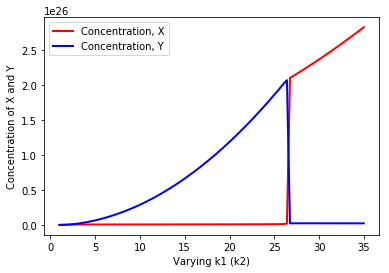

In [10]:
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import numpy as np

a = 6.022140857*(10**(23))
k1 = np.linspace(1,35,100)
# function that returns dy/dt
def model_fun(inp,k1):
    #k1 = 1
    k2 = k1
    k3 = 0.02
    k4 = 0.04
    x = inp[0]
    y = inp[1]
    dydt = (((k2*x)) - ((k3*y*(x**2))/(a**2)))
    dxdt = ((k1*a + ((k3*y*(x**2))/(a**2))) - (((k4*x)) + ((k2*x))))
    return [dxdt,dydt]

# initial condition
z = [0,0]

# time points
t = np.linspace(0,500,500)
# solve ODEs
x1 = odeint(model_fun,z,k1)

# plot results
plt.plot(k1,x1[:,0],'r-',linewidth=2,label='Concentration, X')
plt.plot(k1,x1[:,1],'b-',linewidth=2,label='Concentration, Y')
plt.xlabel('Varying k1 (k2)')
plt.ylabel('Concentration of X and Y')
plt.legend()
plt.show()

## Part 3

Write a Gillespie algorithm to simulate the same four chemical equation and plot the results 
for 500 time units (note that this is a lot of data to plot and you might want to save and plot the data only after X or 
Y have changed in number by at least 5.)

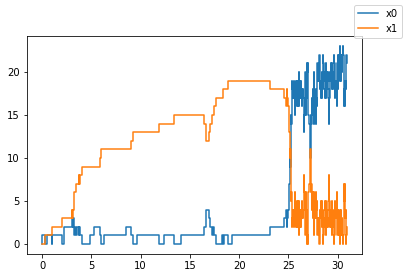

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x287c96fd0f0>)

In [11]:
# Looking at the 4 chemical reactions, the reactant matrix can be formed by placing all the X values in the first element of the 
# list of lists (V_r left side, V_p right side), and the Y values in the second element of the list of lists 
# (V_r left side, V_p right side). 

from pyssa.simulation import Simulation
V_r = np.array([[0, 1, 2, 1], [0, 0, 1, 0]]) # Reactant matrix
V_p = np.array([[1, 0, 3, 0], [0, 1, 0, 0]]) # Product matrix
X0 = np.array([0,0]) # Initial state
k1 = 1
k2 = 2
k3 = 0.02
k4 = 0.04
k = np.array([k1, k2, k3, k4]) # Rate constants
sim = Simulation(V_r, V_p, X0, k) # Declare the simulation object
# Run the simulation
sim.simulate(max_t=100, max_iter=500, chem_flag=True, n_rep=1)
sim.plot()

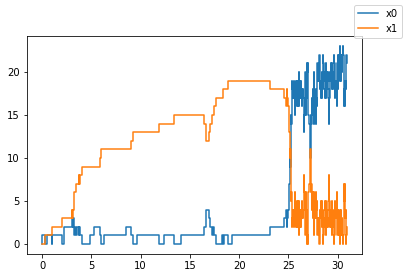

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x287c53e0dd8>)

In [12]:
sim.plot(plot_indices = [0, 1])

In [13]:
results = sim.results
print(results)

<Results n_rep=1 algorithm=direct seed=[0]>


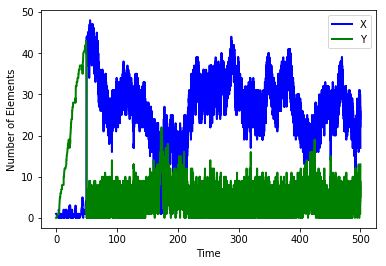

In [14]:
import numpy as np
from numpy.random import choice
import matplotlib.pyplot as plt

x = 0
y = 0


k1 = 1
k2 = 2
k3 = 0.02
k4 = 0.04

p1 = k1
p2 = k2*x
p3 = k3*((x**2)*y)
p4 = k4*x

l2 = []
l3 = []
t = [0]

some_table = [
    [1,0],
    [-1,1],
    [1,-1],
    [-1,0],
]

psum = np.sum(p1+p2+p3+p4)

tim = np.random.exponential(1/psum)
t.append(t[-1] + tim)

while t[-1]<500:
#for f in range(0,500):
    p1 = k1
    p2 = k2*x
    p3 = k3*((x**2)*y)
    p4 = k4*x
    psum = np.sum(p1+p2+p3+p4)
    tim = np.random.exponential(1/psum)
    t.append(t[-1] + tim)
    #print(tim)
    elements = ['eq1', 'eq2', 'eq3', 'eq4']
    weights = [p1, p2, p3, p4]
    weights = [float(j)/sum(weights) for j in weights]
    reaction = np.random.choice(a=4, p=weights)
    if reaction == 0:
        x = x + 1
        l2.append(x)
        l3.append(y)
    elif reaction == 1:
        x-= 1
        l2.append(x)
        y+= 1
        l3.append(y)
    elif reaction == 2:
        x+= 1
        l2.append(x)
        y-= 1
        l3.append(y)
    elif reaction == 3:
        x-= 1
        l2.append(x)
        l3.append(y)


#xp = np.linspace(0,tim,len(l2))
#xp2 = np.linspace(0,tim,len(l3))

plt.plot(t[:-2],l2,'b-', linewidth=2.0)
plt.plot(t[:-2],l3,'g-', linewidth=2.0)
plt.xlabel("Time")
plt.ylabel("Number of Elements")
plt.legend(["X","Y"])
plt.show()

In [15]:
# function that returns dy/dt
from scipy.integrate import odeint
import plotly.plotly as py
import plotly.graph_objs as go
def model_fun(inp,t2):
    k1 = 1
    k2 = 2
    k3 = 0.02
    k4 = 0.04
    x = inp[0]
    y = inp[1]
    dydt = (k2*x - k3*y*(x**2))
    dxdt = (k1 + k3*y*(x**2)) -(k4*x + k2*x)
#     dydt = (((k2*x)) - ((k3*y*(x**2))/(a**2)))
#     dxdt = ((k1*a + ((k3*y*(x**2))/(a**2))) - (((k4*x)) + ((k2*x))))
    return [dxdt,dydt]

# initial condition
z = [0,0]

# time points
t2 = np.linspace(0,500,500)
# solve ODEs
x1 = odeint(model_fun,z,t2)

# Create a trace
dxdt = go.Scatter(
    x = t2,
    y = x1[:,0],
    name = 'X (ODE)'
)

# Create a trace
dydt = go.Scatter(
    x = t2,
    y = x1[:,1],
    name = 'Y (ODE)'
)

line3 = go.Scatter(
    x = t[:-2],
    y = l2,
    name = 'X (Gillespie algorithm)'
)

line4 = go.Scatter(
    x = t[:-2],
    y = l3,
    name = 'Y (Gillespie algorithm)'
)

data = [dxdt,dydt,line3, line4]

In [16]:
layout = go.Layout(
    title=go.layout.Title(
        text='ODE vs Gillespie algorithm',
        xref='paper',
        x=0
    ),
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text='Time',
            font=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        )
    ),
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            text='Concentration, X,Y',
            font=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        )
    ) 
)

fig5 = go.Figure(data=data, layout=layout)

py.iplot(fig5,filename='styling-names')

C:\Users\hp\Anaconda3\lib\site-packages\chart_studio\plotly\plotly.py:248: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some suggestions:
(1) Use the `plotly.graph_objs.Scattergl` trace object to generate a WebGl graph.
(2) Trying using the image API to return an image instead of a graph URL
(3) Use matplotlib
(4) See if you can create your visualization with fewer data points

If the visualization you're using aggregates points (e.g., box plot, histogram, etc.) you can disregard this warning.



The draw time for this plot will be slow for all clients.


C:\Users\hp\Anaconda3\lib\site-packages\chart_studio\api\v1\clientresp.py:44: UserWarning:

Estimated Draw Time Too Long



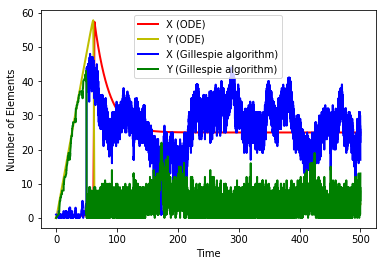

<Figure size 14400x14400 with 0 Axes>

In [17]:
plt.plot(t2,x1[:,0],'r-', linewidth=2.0)
plt.plot(t2,x1[:,1],'y-', linewidth=2.0)
plt.plot(t[:-2],l2,'b-', linewidth=2.0)
plt.plot(t[:-2],l3,'g-', linewidth=2.0)
plt.xlabel("Time")
plt.ylabel("Number of Elements")
plt.legend(["X (ODE)","Y (ODE)",'X (Gillespie algorithm)','Y (Gillespie algorithm)'])
plt.figure(figsize=(200,200))
plt.show()

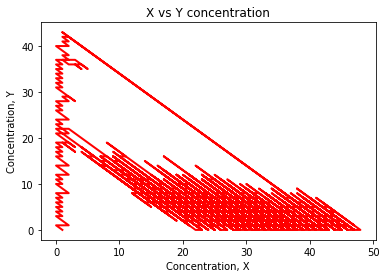

In [18]:
plt.plot(l2, l3,'r-',linewidth=2)
plt.xlabel('Concentration, X')
plt.ylabel('Concentration, Y')
plt.title('X vs Y concentration')
plt.show()

In [19]:
k1 = 1
k2 = 2
k3 = 0.02
k4 = 0.04

from scipy.integrate import odeint

# function that returns dy/dt
def model_fun(inp,t):
    k1 = 1
    k2 = 2
    k3 = 0.02
    k4 = 0.04
    x = inp[0]
    y = inp[1]
    dydt = (k2*x - k3*y*(x**2))
    dxdt = (k1 + k3*y*(x**2)) -(k4*x + k2*x)
#     dydt = (((k2*x)) - ((k3*y*(x**2))/(a**2)))
#     dxdt = ((k1*a + ((k3*y*(x**2))/(a**2))) - (((k4*x)) + ((k2*x))))
    return [dxdt,dydt]

# initial condition
z = [0,0]

# time points
t = np.linspace(0,500,500)
# solve ODEs
x1 = odeint(model_fun,z,t)

# Create a trace
conc = go.Scatter(
    x = x1[:,0],
    y = x1[:,1],
    name = 'ODE'
)

line1 = go.Scatter(
    x = l2,
    y = l3,
    name = 'Gillespie algorithm'
)


data = [conc, line1]

layout = go.Layout(
    title=go.layout.Title(
        text='X vs Y concentration',
        xref='paper',
        x=0
    ),
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text='Concentration, X',
            font=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        )
    ),
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            text='Concentration, Y',
            font=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        )
    )
)
fig6 = go.Figure(data=data, layout=layout)

py.iplot(fig6,filename='styling-names')

C:\Users\hp\Anaconda3\lib\site-packages\chart_studio\plotly\plotly.py:248: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some suggestions:
(1) Use the `plotly.graph_objs.Scattergl` trace object to generate a WebGl graph.
(2) Trying using the image API to return an image instead of a graph URL
(3) Use matplotlib
(4) See if you can create your visualization with fewer data points

If the visualization you're using aggregates points (e.g., box plot, histogram, etc.) you can disregard this warning.



The draw time for this plot will be slow for clients without much RAM.


C:\Users\hp\Anaconda3\lib\site-packages\chart_studio\api\v1\clientresp.py:44: UserWarning:

Estimated Draw Time Slow

